By creating my own dataset, I compared KNN regression with distance and uniform weighting methods.

[[0.16499646]
 [0.1685402 ]
 [0.18362915]
 [0.25381215]
 [0.28726011]
 [0.32711838]
 [0.52143142]
 [0.79714649]
 [0.80137288]
 [1.03156859]
 [1.13244662]
 [1.16872692]
 [1.17919527]
 [1.21897929]
 [1.2586483 ]
 [1.36338823]
 [1.53416608]
 [1.60165338]
 [1.83623424]
 [2.06719541]
 [2.19948792]
 [2.28957034]
 [2.31370709]
 [2.42305878]
 [2.72252837]
 [2.7450417 ]
 [2.96272364]
 [3.03426024]
 [3.04745886]
 [3.25771726]
 [3.50449404]
 [3.64392705]
 [3.70141754]
 [3.78180452]
 [4.01850049]
 [4.05470025]
 [4.09412683]
 [4.26595195]
 [4.38448442]
 [4.64864904]] [[ 0.9890856 ]
 [ 0.16774341]
 [ 0.1825989 ]
 [ 0.25109579]
 [ 0.28332567]
 [-0.29051466]
 [ 0.49812184]
 [ 0.71536511]
 [ 0.71831191]
 [ 0.85810547]
 [ 1.78515242]
 [ 0.92025316]
 [ 0.92429917]
 [ 0.9387481 ]
 [ 0.9516761 ]
 [ 2.24430208]
 [ 0.99932919]
 [ 0.99952396]
 [ 0.96497771]
 [ 0.87930324]
 [-0.584763  ]
 [ 0.75261356]
 [ 0.73650274]
 [ 0.65828172]
 [ 0.40690588]
 [-0.01101029]
 [ 0.17791674]
 [ 0.10712645]
 [ 0.09399484]
 [-0

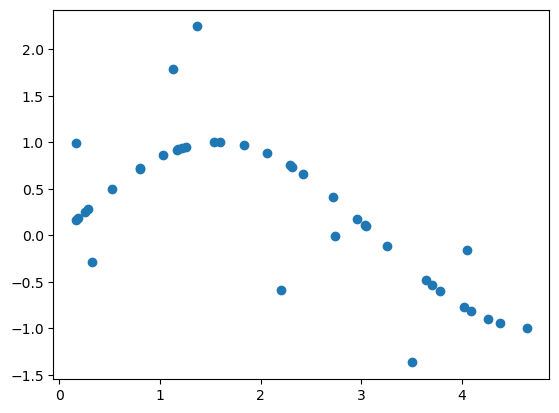

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

# uniform distribution
X = np.sort(5* np.random.rand(40, 1), axis = 0) #features
y = np.sin(X) #targets

# add noise 
y[::5] += 3 * (0.5 - np.random.rand(8, 1))

print(X, y)
plt.scatter(X, y)

Uniform: All neighbors are of equal importance. The value of the target point is calculated by taking the arithmetic mean of its neighbors. It's good for generalizations when the data is noisy.

Distance: Neighbors closer to the target point have a greater influence. When making predictions, the values ​​of the neighbors are multiplied by the inverse of their distances to obtain a weighted average. If the data is very clean and every point is important, its good.

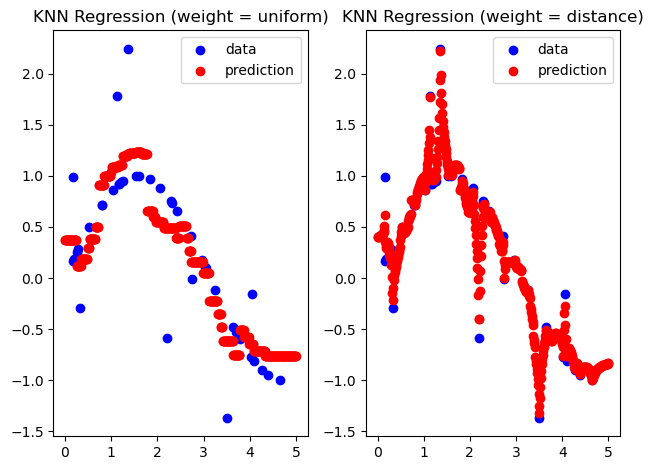

In [20]:
from sklearn.neighbors import KNeighborsRegressor

# test points
T = np.linspace(0, 5, 500)[:, np.newaxis]

for i, weight in enumerate(['uniform', 'distance']):
    knn = KNeighborsRegressor(n_neighbors=5, weights=weight)
    y_pred = knn.fit(X, y).predict(T)
    
    plt.subplot(1, 2, i + 1)
    plt.scatter(X, y, color = "blue", label = "data")
    plt.scatter(T, y_pred, color = "red", label = "prediction")
    plt.axis("tight")
    plt.legend()
    plt.title(f"KNN Regression (weight = {weight})")

plt.tight_layout()
plt.show()